In [1]:
import numpy as np
import numpy.random as random
import math
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import MonteCarloPhoton as MCP

In [2]:
lightdim = np.array([[-13,13],
           [-13,13]])
detectordim = np.array([[-13,13],
              [-13,13]])
d = 1

temperature = 5000

In [3]:
resultscollimated = MCP.MCtest_collimated(lightdim, temperature, detectordim, d)
resultslambertian = MCP.MCtest_lambertian(lightdim, temperature, detectordim, d)

resultscollimatedhitx =[]
resultscollimatedhity =[]
resultslambertianhitx= []
resultslambertianhity = []

for i in range(len(resultscollimated[2,:])):
    if resultscollimated[2, i] ==True:
        resultscollimatedhitx.append(resultscollimated[0,i])
        resultscollimatedhity.append(resultscollimated[1,i])
for i in range(len(resultslambertian[2,:])):
    if resultslambertian[2,i] ==True:
        resultslambertianhitx.append(resultslambertian[0,i])
        resultslambertianhity.append(resultslambertian[1,i])


histcollimated, xedges1, yedges1 = np.histogram2d( resultscollimatedhitx, 
                                                  resultscollimatedhity, 
                                                  bins=50, 
                                                  range = detectordim)

histlambertian, xedges2, yedges2 = np.histogram2d(resultslambertianhitx, 
                                                  resultslambertianhity, 
                                                  bins=50, 
                                                  range = detectordim)

C:\Users\Oem\Python\Repos\placement\MonteCarloPhoton.py:182: RuntimeWarning: overflow encountered in exp
  return a/ ( (wav**5) * (np.exp(b) - 1.0) )
C:\Users\Oem\Python\Repos\placement\MonteCarloPhoton.py:269: RuntimeWarning: overflow encountered in exp
  return a/ ( (wav**5) * (np.exp(b) - 1.0) )


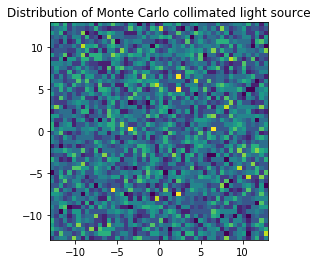

In [4]:
plt.figure(1)
plt.imshow(histcollimated, extent=[detectordim[0,0],
                                   detectordim[0,1],
                                   detectordim[1,0],
                                   detectordim[1,1]])
plt.title('Distribution of Monte Carlo collimated light source')
plt.show()

plt.figure(2)
plt.imshow(histlambertian, extent = [detectordim[0,0],
                                   detectordim[0,1],
                                   detectordim[1,0],
                                   detectordim[1,1]])
plt.title('Distribution of Monte Carlo lambertian light source on detector')
plt.show()

plt.figure(3)
plt.hist(resultscollimated[3,:]*1e-9, bins=50, label = 'Collimated light source')
plt.hist(resultslambertian[3,:]*1e-9, bins=50, label = 'Lambertian spread light source')
plt.xlabel(r'Wavelength, $n$m)')
plt.ylabel(r'Frequency')
plt.legend()
plt.show()

In [5]:
def max_boltz_E(E,T):
    """Returns the probability of a particular energy at a equillibrium
    temperature T.
    ---
    Parameterss:
    -E: float J-joules
    -T: float Kelvin
    Returns: float between 0 and 1."""
    k = 1.38*10**-23
    return 2*np.sqrt(E/math.pi)*(1/k*T)**(3/2)*np.exp(-E/(k*T))

In [6]:
data = np.zeros((6, 10000))
for i in range(10000):
    a, b, c = MCP.photocathode(lightdim, 0.5, 1.0)
    X_Ycoordinate, traj_vector, elec_state = MCP.photocathode_gap(a, b, c)
    data[:, i] = *X_Ycoordinate, *traj_vector, *elec_state

In [7]:
plt.figure()
hist, x_edges, y_edges = np.histogram2d(data[0,:], data[1, :], bins = 50,range = detectordim)
plt.imshow(hist, extent =[detectordim[0,0],detectordim[0,1],detectordim[1,0],detectordim[1,1]])
plt.show()

In [8]:
x = np.empty(10000)
for i in range(len(x)):
    x[i] = MCP.max_boltz_E(0.5, 0, 3.)
    
plt.hist(x, bins=50)

AttributeError: module 'MonteCarloPhoton' has no attribute 'max_boltz_E'

In [9]:
data = np.empty((6, 10000))
for i in range(10000):
    a, b, c = MCP.photocathode2(lightdim, 0.5)
    X_Ycoordinate, traj_vector, elec_state = MCP.photocathode_gap2(a, b, c)
    data[:, i] = *X_Ycoordinate, *traj_vector, *elec_state

NameError: name 'cos_6_diceroll' is not defined

In [ ]:
plt.figure()
hist, x_edges, y_edges = np.histogram2d(data[0,:], data[1, :], bins = 50,range = detectordim)
plt.imshow(hist, extent =[detectordim[0,0],detectordim[0,1],detectordim[1,0],detectordim[1,1]])
plt.show()

In [ ]:
print(data[5, :])


In [ ]:
def f(x):
    return x
numb = MCP.number_gen(f, (0, 2))

In [ ]:
numb.dice_roll()

In [ ]:
x = np.empty(10000)
for i in range(10000):
    x[i] = numb.dice_roll()

In [ ]:
plt.hist(x)

In [ ]:
numb.normalise()

In [ ]:
x = np.empty(10000)
for i in range(10000):
    x[i] = numb.dice_roll()

In [ ]:
plt.hist(x)